# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# connect to database and verify contents
conn = sqlite3.connect('./data/LawrenceTheFans.db')
cursor = conn.cursor()
for row in cursor.execute("SELECT title FROM posts ORDER BY created_utc DESC LIMIT 10"):
    print(row)

conn.close()

('I Heart Top 39 - Watcha’ Want',)
('I have 2 GA tickets available for the Denver show tomorrow night.',)
('2000+ Subscriber Video AMA!',)
('Two tickets for Salt Lake tonight.',)
("This chaotic viral song is dividing TikTok and people are beefing over if it's great or terrible",)
('Minnesota',)
('Columbus Resale Prices',)
('YouTube music recognizing my Lawrence addiction ',)
('Anyone down for a dress up theme for Denver night?? 10/19',)
('Is there an opening act for the Family Business tour?',)


In [3]:
# connect to database and create dataframes for each table
conn = sqlite3.connect('./data/LawrenceTheFans.db')
cursor = conn.cursor()

df_posts = pd.read_sql_query("SELECT * FROM posts", conn)
df_comments = pd.read_sql_query("SELECT * FROM comments", conn)

conn.close()



In [4]:
# verify dataframes
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            612 non-null    object
 1   author        612 non-null    object
 2   title         612 non-null    object
 3   created_utc   612 non-null    int64 
 4   permalink     612 non-null    object
 5   score         612 non-null    int64 
 6   num_comments  612 non-null    int64 
 7   url           612 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.4+ KB


In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1076 non-null   object
 1   submission_id  1076 non-null   object
 2   parent_id      1076 non-null   object
 3   created_utc    1076 non-null   int64 
 4   author         1076 non-null   object
 5   permalink      1076 non-null   object
 6   score          1076 non-null   int64 
 7   body           1076 non-null   object
dtypes: int64(2), object(6)
memory usage: 67.4+ KB


In [6]:
# Apply Vader Sentiment Analysis to each post's title
analyzer = SentimentIntensityAnalyzer()
df_posts['sentiment_object'] = [analyzer.polarity_scores(i) for i in df_posts['title']]
df_posts['sentiment'] = [analyzer.polarity_scores(i)['compound'] for i in df_posts['title']]
df_posts['sentiment'].mean()


0.10027679738562091

In [7]:
# Apply Vader Sentiment Analysis to each comment's title
analyzer = SentimentIntensityAnalyzer()    
df_comments['sentiment_object'] = [analyzer.polarity_scores(c) for c in df_comments['body']]
df_comments['sentiment'] = [analyzer.polarity_scores(i)['compound'] for i in df_comments['body']]
df_comments['sentiment'].mean()

0.33013615241635685

In [8]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1076 non-null   object 
 1   submission_id     1076 non-null   object 
 2   parent_id         1076 non-null   object 
 3   created_utc       1076 non-null   int64  
 4   author            1076 non-null   object 
 5   permalink         1076 non-null   object 
 6   score             1076 non-null   int64  
 7   body              1076 non-null   object 
 8   sentiment_object  1076 non-null   object 
 9   sentiment         1076 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 84.2+ KB


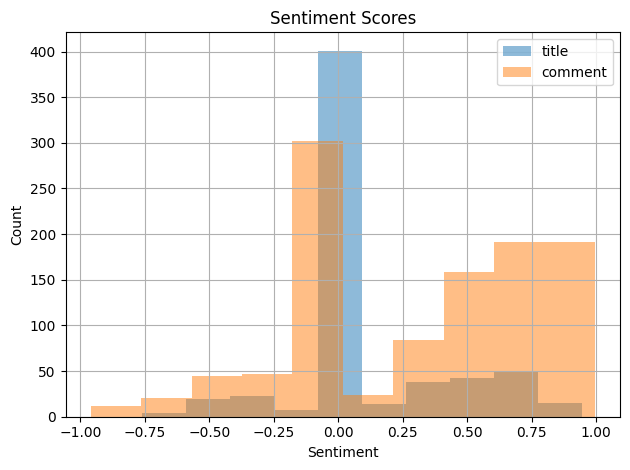

In [9]:
# plot histograms of sentiment scores
df_posts['sentiment'].hist( alpha = .5 )
df_comments['sentiment'].hist (alpha= .5)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Scores')
# add a legend
plt.legend( ['title', 'comment'])
plt.tight_layout()
plt.show()

In [10]:
# Examine descriptive statistics of sentiment scores
print( "Sentiment Scores: Post titles")
print( df_posts['sentiment'].describe()) 

print( "\n\nSentiment Scores: Comments")
print( df_comments['sentiment'].describe())

Sentiment Scores: Post titles
count    612.000000
mean       0.100277
std        0.289240
min       -0.759700
25%        0.000000
50%        0.000000
75%        0.202300
max        0.944500
Name: sentiment, dtype: float64


Sentiment Scores: Comments
count    1076.000000
mean        0.330136
std         0.442535
min        -0.959500
25%         0.000000
50%         0.419900
75%         0.717875
max         0.995000
Name: sentiment, dtype: float64


In [11]:
# posts with highest and lowest sentiment scores
pd.options.display.max_colwidth = None
df_posts.sort_values('sentiment', ascending = False)[['title', 'sentiment']]


,title,sentiment
109,I know I’m supposed to try on the discord but haven’t really had luck. Anyone going to the Minneapolis show? I’d love to chat and maybe meet up! I’ll be there with my mom lol (I don’t know how to ask this without being weird),0.9445
504,"Me and a few friends had our final senior band concert get cancelled and we had wanted to play Do You Wanna Do Nothing With Me since like freshman year, so we felt like it was the perfect opportunity to do it virtually! So here is our cover of Do You Wanna Do Nothing With Me. Enjoy!",0.9220
390,Any Ohio fans here?? I just peeped Lawrence is headlining one of my favorite festivals at Legend Valley this summer! Soooo excited for this the Werk Out has the best vibes,0.9145
286,"Anybody have ANY idea what happened to the live version of ""Alabi"" they played on that rooftop? I forget the YouTube page but I haven't been able to find that video for YEARS at this point and it was a fantastic performance. Way better than the studio version they have.",0.8750
500,Such a beautiful video. Great song and incredible arrangement. Bravo!,0.8516
...,...,...
579,"""Try"" should be turned into a hip hop beat for Hi Lo Jack -- my stab at it.",-0.5859
580,Clyde DESTROYS Gracie with him tambourine -- NSFW,-0.6523
471,😱,-0.7003
358,Clyde Lawrence singing Don’t Lose Sight while Gracie was out sick,-0.7184


In [12]:
# comments with the highest and lowest sentiment scores
pd.options.display.max_colwidth = None
df_posts.sort_values('sentiment', ascending = False)[['title', 'sentiment']].tail(10)

,title,sentiment
526,Potential source of voicings for So Damn Fast,-0.5410
540,Piano tutorial for So Damn Fast?,-0.5410
443,ICYMI: Lawrence x Scary Pockets!,-0.5411
495,Lawrence discord - chat with fans and Linus Lawrence himself!!!,-0.5538
412,Does anyone know the chords for “don’t lose sight”????,-0.5661
579,"""Try"" should be turned into a hip hop beat for Hi Lo Jack -- my stab at it.",-0.5859
580,Clyde DESTROYS Gracie with him tambourine -- NSFW,-0.6523
471,😱,-0.7003
358,Clyde Lawrence singing Don’t Lose Sight while Gracie was out sick,-0.7184
68,They KILLED it in ATL!,-0.7597


In [13]:
# comments with the highest and lowest sentiment scores
pd.options.display.max_colwidth = None
df_comments.sort_values('sentiment', ascending = False)[['body', 'sentiment']]

,body,sentiment
156,"I've got a few that stick with me since I started listening to Lawrence after it coming up while listening to music with my (now 6 y/o) daughter. I went to my first Lawrence concert, and her first ever concert, at Radio City Music Hall, so I hold these lyrics close:\n\n#1 - 23 - ""Waiting, I'm waiting. Mice are complaining""\n\nYes, mice are complaining. She was 5 and that's what she heard and sang so it's adorable. She now knows that it's ""might start"" but I can't help but sing ""mice are"" instead.\n\nThe next one is two lines from same song.\n\n#2 - Funeral - ""And my father couldn't hold me""\n\nGiven what I wrote above about Lawrence and how I connect the band closely to my daughter, this hits me hard. The whole song really, but that line a lot. The other line from this song that means a lot is\n\n""And the words I should have spoken"" \n\nThis line for two reasons. One, it's how my daughter refers to the song when she wants it played, asking for ""should have spoken."" But also, while it's straightforward, it's also such an honest and raw feeling that I think everyone understands. As I get older, time flies by faster and faster. You don't see people as much. You might talk to some people once a week, once a month, maybe only once a year. You don't know when the last time will be. Tell the people around you that you love them. Life is too short.\n\nLastly, I just have to throw this out there too.\n\n#3 - Guy I Used To Be the leading line and title of the track ""Goodbye to the guy I used to be."" \n\nHonestly, the entire chorus. This is such a clever song because it's written open ended. I imagine it's a love song for Clyde. Or at least, it's interpreted that way for most I'd think. For me? I guess you could still call it that but I think of it in terms of my transition to becoming a father. Not just for my aforementioned older daughter, but my younger one as well, and being there for my wife too. My dreams and desires have changed. They are the only things that matter to me.\n \nAnyhow, it's really kind of you to do this give away. It would be awesome to win! But good luck to everyone!",0.9950
765,"As everyone else has mentioned Jon Bellion has really ramped up the amount of production on their newer albums. Lots of layered instrumentals and effects that bring it more in line with his style, but it's also clearly something they're into.\n\nI think a big reason for this is they're REALLY trying to crossover and capture a larger mainstream/radio audience while still staying true to their sound/vibe. Personally I think they're doing a good job at that. Their new stuff definitely sounds more radio friendly, but it also still sounds 100% like Lawrence to me. Just Lawrence with a pop producer throwing some spice on it.\n\nI like both styles and I love that we get both versions. The newer studio albums have the poppier, ""overproduced"" versions that are fun in their own way, and then their 'liveish"" versions and their live shows are more in line with their original sound which is much more stripped down and *authentic* for lack of a better term. I guess I'm just lucky that I happen to enjoy both.",0.9943
103,"hey! i went to their new orleans show yesterday, it was amazing! i went alone (i’ve been to about twenty concerts alone), the fans were all really kind but as someone who doesn’t really know how to talk to people, i just kept to myself but it really felt like a community… a family. i was a bit anxious waiting for the show to start but that’s typical me. once the show started it was really amazing!! i was front row, i didn’t wear earplugs but i recommend that anyone else does lol… it wasn’t as loud as other concerts i’ve been to but it was pretty loud!\n\nthe band was pretty interactive, and put on a great show of course! one of my favorite concerts! you’ll have a great time for sure.",0.9927
347,"If someone tapes, please post or message me! Also, be awesome to collect all best recordings if no one 

# Summary

In this week's assignmment, I'm using data from a subreddit for fans of the band "Lawrence". Fans of the band are generally extremely upbeat and positive; they LOVE this band and we should expect posts and comments in this subreddit to skew positive.

I began by importing libraries:
* **pandas:** working with dataframes, accessing data stores, data analytics, and data visualization
* **matplotlib:** data visualization
* **sqlite3:** a lightweight, SQL compliant, disk-based database implemented in C
* **vaderSentiment:** VADER (Valence Aware Dictionary and sEntiment Reasoner) is an open-source sentiment analysis tool trained on social media
https://vadersentiment.readthedocs.io/en/latest/

Next, I opened a connection to the local database in which data from posts and comments has been stored.  From that connection, I created dataframes from the tables 'posts' and 'comments'.

I then constructed an instance of the SentimentIntensityAnalyzer class from the vaderSentiment library and applied the sentiment analizer to each of the two dataframes. For the sake of learning, I collected the full sentiment profile as well as the compound score.

Next, I plotted histograms of both titles and comments. As expected, the sentiment scores for both titles and comments skewed positive.

Looking at the top positive and negative results from both tables, one thing became very clear... some words in other contexts might score very negative, but in this context are neutral or positive.  Some examples from post titles:

* They KILLED it in ATL!
In this context, KILLED means that the band performed extremely well.

* Clyde Lawrence singing Don’t Lose Sight while Gracie was out sick
Being 'out sick' is merely descriptive, and so should be neutral.

* Lawrence discord - chat with fans and Linus Lawrence himself!!!
In this context, 'discord' refers to the platform not to contention between parties


##### Some ideas about how this data could be used
In a data science context, one might use this data to train models specificially on the lexicon of music fans.  They might have jargon that in other contexts are negative, but in this context are positive ( e.g. "they killed", "they slayed", "check out this sick cover!")

In a business context, one might use this analysis to assess how the band connects with their audience on an emotional level and that might inform how they promote the band in the future. From the top three scores in the comments section, three audience personas are clearly on display:
* Father and daughter:  the band is family-friendly and the songs tend to be happy and upbeat. Families can enjoy Lawrence together and the music brings them closer.
* Audiophile: in the second top comment, the audiophile enjoys the variety of mixes that the band produces... the studio productions, the live versions, and the stripped-down acoustic sets
* The Lonely Heart:  this type of person finds comfort in the community of kind-hearted fands that Lawrence builds

A marketing team could use this information to promote to these different market segments.




